## P1 - b & c & d) Program

In [3]:
# lib
import numpy as np
import matplotlib.pyplot as plt
import copy
from typing import List, Dict, Optional

In [4]:
# Perceptron
def perceptron(
    X: List[List[float]], 
    y: List[int], 
    max_pass=500
)-> [List[float], float, List[int]]:
    """
    @param          X: \in R^{nxd}
    @param          y: \in {-1,1}^n 
    @param   max_pass: \in N
    """
    # shuffle data
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
    # train
    X = np.array(X)
    y = np.array(y)
    [n, d] = np.shape(X)
    w = np.random.uniform(-1,1,d) # assume x padded with first bias term
    mistake = []
    for t in range(0, max_pass): # max passes / iterations
        mistake.append(0)
        for i in range(0, n): # iterate through all dataset
            x_i = X[i, :]
            if (y[i] * (np.dot(x_i, w))) <= 0:
                w = w + y[i] * x_i
                mistake[t] += 1

        if (t >= 1) and (mistake[t] == mistake[t-1]):
            break # Converged

    return w, mistake

# Adaline
def adaline(
    X: List[List[float]], 
    y: List[float], 
    # Configuration with Default Settings
    max_pass: int       = 500,
    eta: float          = 4e-3,
    error_tol: float    = 1e-5,
)-> [List[float], float, Dict]:
    """
    @param          X: \in R^{nxd}
    @param          y: \in R^n 
    @param   max_pass: \in N
    @param        eta: \in [0,1]    (learning rate)
    @param  error_tol: \sim 0       (tolerance for steady state)
    """
    # shuffle data
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
    # train
    X = np.array(X)
    XT = np.transpose(X)
    y = np.array(y)
    [n, d] = np.shape(X) 
    w = np.random.uniform(-1,1,d) # assume x padded with first bias term
    mistake = []
    # logger to track the progress
    training_log = {
        "t" : [],
        "w" : [],
        "training_error": [],
    }
    # training
    for t in range(0, max_pass): # max passes / iterations
        pw = copy.deepcopy(w)
        # update:
        f_err = ( np.dot(X, w) - y ) # pred - y
        dw = np.dot(XT, f_err) 
        w = w - eta * dw
        # compute loss and error:
        error = 1 / 2 * (np.linalg.norm(f_err) ** 2)
        # log progress:
        training_log["t"].append(t)
        training_log["w"].append(w)
        training_log["training_error"].append(error)
        # stopping criteria:
        if np.linalg.norm((pw - w), ord=1) <= error_tol: # L1 Diff
            break # STOPPING
    
    return w, training_log

def print_report_adaline(
    training_log: Dict,
    tag: str,
):
    # plot status
    fig1 = plt.gcf()
    ax1 = plt.subplot(111)
    plt.plot(training_log["t"], training_log["training_error"])
    plt.title("Training Progress")
    plt.ylabel("Training Error")

    plt.xlabel("iteration")
    plt.show()
    fig1.savefig("fig/p1/p1_adaline_training_progress_{tag}.png".format(
        tag = tag
    ), bbox_inches = 'tight')

    print(training_log["t"][-1])
    print("> [{tag:8s}] T: {itr:3d} | Training Error: {train_err:.5f} ".format(
        tag         = tag,
        itr         = training_log["t"][-1],
        train_err   = training_log["training_error"][-1],
    ))

def print_report_perceptron(
    mistake: List[int],
    tag: str,
):
    fig1, ax1 = plt.subplots()
    ax1.plot((mistake))
    ax1.set_title("Mistakes vs. Passes")
    ax1.set_xlabel("number of passes")
    ax1.set_ylabel("number of mistakes")
    fig1.savefig("fig/p1/p1_perceptron_progress_{tag}.png".format(
        tag = tag
    ), bbox_inches = 'tight')

def w2str(w:List[float])->str:
    return (" {A:.3f} x + {B:.3f} y + {C:.3f} z = {D:.3f}"\
        .format(A=w[1], B=w[2], C=w[3], D=w[0]))

In [5]:
def plot3d(
    X: List[List[float]], 
    y: List[int], 
    y_label: Dict[int, str],
    ws: Dict[str, List[float]],
    tag: str,
    view_opt: Optional[List[float]]=None
)-> None:
    X,y = np.array(X),np.array(y)
    # pre-processing
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    z_min, z_max = X[:, 3].min() - 1, X[:, 3].max() + 1
    px3d = np.transpose(X[:, 1:4])
    yt = np.transpose(y)

    # plot init
    fig1 = plt.gcf()
    ax = plt.axes(projection='3d')
    # ax.set_aspect(1)
    ax.grid()

    # Plot Points
    for y_val, label in y_label.items():
        ax.scatter(px3d[0][yt == y_val], px3d[1][yt == y_val], px3d[2][yt == y_val],\
            label=label, linewidth=0.5)

    # Plot Hyper-planes
    xx = np.linspace(-3,3,10)
    yy = np.linspace(-3,3,10)
    XX,YY = np.meshgrid(xx,yy)
    for name, w in ws.items():
        w = np.array(w)
        ZZ = (w[0] - w[1] * XX - w[2] * YY) / w[3]
        ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
        surf1 = ax.plot_surface(XX, YY, ZZ,alpha=0.5, label=name)
        surf1._facecolors2d=surf1._facecolors3d
        surf1._edgecolors2d=surf1._edgecolors3d
    if view_opt is not None:
        ax.view_init(elev=view_opt[0], azim=view_opt[1])
    ax.legend()
    plt.show()
    fig1.set_size_inches(8,6)
    fig1.savefig("fig/p1/p1_plot3d_{tag}.png".format(
        tag = tag
    ), bbox_inches = 'tight', dpi=200)


In [6]:
TRAIN_X = [[-1, 0.8, 0.7, 1.2], [-1, -0.8,- 0.7, 0.2], [-1, -0.5,0.3,- 0.2], [-1, -2.8, -0.1, -2], [-1, 1.2,- 1.7, 2.2], [-1, -0.8,-2, 0.5], [-1, -0.5,-2.7,- 1.2], [-1, 2.8, -1.4, 2.1]]
TRAIN_Y = [-1,-1,-1,-1,1,1,1,1]

 1.818 x + -2.540 y + -0.132 z = 1.634


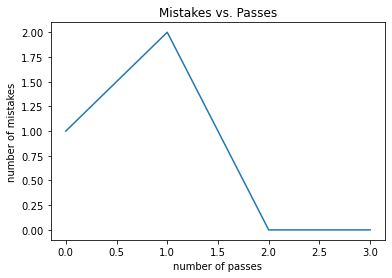

In [7]:
%matplotlib inline
np.random.seed(341)
w1, mistake = perceptron(X=TRAIN_X, y=TRAIN_Y, max_pass=30)
print_report_perceptron(mistake, tag="")
print(w2str(w1))

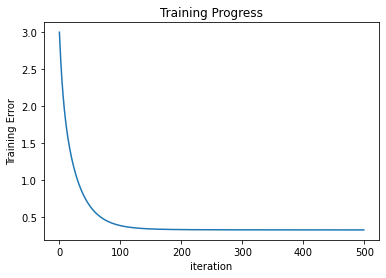

499
> [        ] T: 499 | Training Error: 0.33184 
 0.129 x + -0.761 y + 0.110 z = 0.752


In [8]:
%matplotlib inline
w2, log = adaline(X=TRAIN_X, y=TRAIN_Y)
print_report_adaline(log, tag="")
print(w2str(w2))

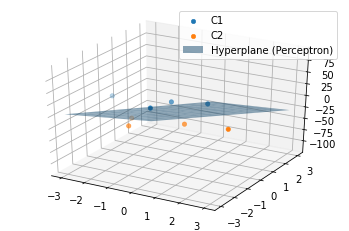

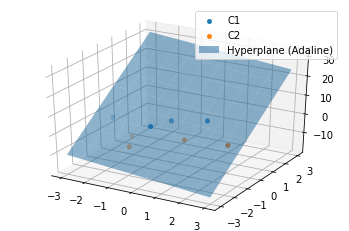

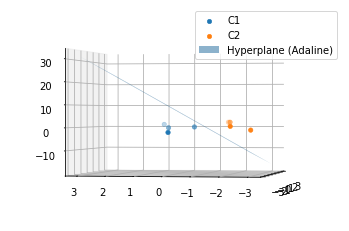

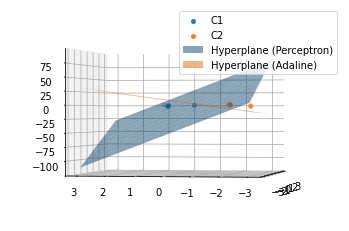

In [9]:
%matplotlib inline
plot3d(X=TRAIN_X, y=TRAIN_Y, 
    y_label={
        -1  : "C1",
        1   : "C2"
    },
    ws={
        "Hyperplane (Perceptron)"   : w1,
    },
    tag="perceptron"
)
plot3d(X=TRAIN_X, y=TRAIN_Y, 
    y_label={
        -1  : "C1",
        1   : "C2"
    },
    ws={
        "Hyperplane (Adaline)"      : w2
    },
    tag="Adaline"
)
plot3d(X=TRAIN_X, y=TRAIN_Y, 
    y_label={
        -1  : "C1",
        1   : "C2"
    },
    ws={
        "Hyperplane (Adaline)"      : w2
    },
    tag="Adaline(div)",
    view_opt=[0, 190]
)
plot3d(X=TRAIN_X, y=TRAIN_Y, 
    y_label={
        -1  : "C1",
        1   : "C2"
    },
    ws={
        "Hyperplane (Perceptron)"   : w1,
        "Hyperplane (Adaline)"      : w2
    },
    tag="both",
    view_opt=[0, 190]
)


[ Valid Plane ] Perceptron: True | Adaline: False


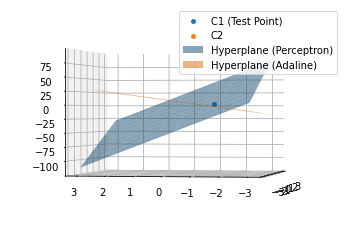

In [ ]:
##  Qd) Plane Validation for test points
y_test = -1
x_test = [-1, -1.3, -1.5, 2]

is_perceptron = (y_test * (np.dot(x_test, w1))) > 0
is_adaline = (y_test * (np.dot(x_test, w2))) > 0

print("[ Valid Plane ] Perceptron: {0} | Adaline: {1}".format(is_perceptron, is_adaline))

# plot the point as well
plot3d(X=[x_test], y=[y_test], 
    y_label={
        -1  : "C1 (Test Point)",
        1   : "C2"
    },
    ws={
        "Hyperplane (Perceptron)"   : w1,
        "Hyperplane (Adaline)"      : w2
    },
    tag="test_point",
    view_opt=[0, 190]
)

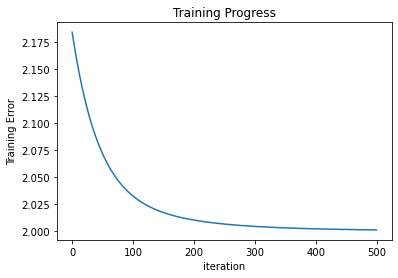

499
> [        ] T: 499 | Training Error: 2.00080 
[-0.0276291   0.02866499]


In [13]:
w3, log3 = adaline(X=XNOR_TRAIN_X, y=XNOR_TRAIN_Y)
print_report_adaline(log3, tag="")
print((w3))